In [1]:
# objective: generate the particle size structure for the CMIP6 models
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import glob,os,subprocess
import IPython.display as display
import math
%matplotlib inline
import math as m
#from wcmatch.pathlib import Path # Handling of path object
from plotnine import *
from datetime import datetime as dt

In [2]:
from scipy.stats import linregress

In [3]:
import math as m
#from wcmatch.pathlib import Path # Handling of path object
from plotnine import *

In [4]:
carbon_molar_mass = 12.011 # g/mol
varlist=['phypico', 'phymisc', 'phydiat', 'zmeso', 'zmicro']

In [5]:
chla_hist = '/work/jyl/proj/CMIP6_size/CMIP6_output_regular_grid/gfdl_hist_schl_gr_monthly_1965_2014.nc'
chla_ssp5 = '/work/jyl/proj/CMIP6_size/CMIP6_output_regular_grid/gfdl_ssp585_schl_gr_monthly_2015_2100.nc'

In [6]:
chl_hist=xr.open_mfdataset(chla_hist)
chl_ssp5 =xr.open_mfdataset(chla_ssp5)

In [7]:
chl_hist=chl_hist.assign_coords(lon=chl_hist.Lon, lat=chl_hist.Lat)
chl_hist = chl_hist.rename({'x': 'lon','y': 'lat'})
chl_hist=chl_hist.sel(time= slice(1985.0, 2015.0))
chl_ssp5=chl_ssp5.assign_coords(lon=chl_ssp5.Lon, lat=chl_ssp5.Lat)
chl_ssp5 = chl_ssp5.rename({'x': 'lon','y': 'lat'})
chl_ssp5=chl_ssp5.sel(time= slice(2070.0, 2100.0))
chl_hist

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 360)
Coordinates:
  * time     (time) float64 1.985e+03 1.985e+03 ... 2.015e+03 2.015e+03
  * lon      (lon) float64 dask.array<chunksize=(360,), meta=np.ndarray>
  * lat      (lat) float64 dask.array<chunksize=(180,), meta=np.ndarray>
Data variables:
    Lat      (lat) float64 dask.array<chunksize=(180,), meta=np.ndarray>
    Lon      (lon) float64 dask.array<chunksize=(360,), meta=np.ndarray>
    schl     (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  17-Feb-2021 14:32:48
    _FillValue:     1e+20

In [8]:
chl_ssp5

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 360)
Coordinates:
  * time     (time) float64 2.07e+03 2.07e+03 2.07e+03 ... 2.1e+03 2.1e+03
  * lon      (lon) float64 dask.array<chunksize=(360,), meta=np.ndarray>
  * lat      (lat) float64 dask.array<chunksize=(180,), meta=np.ndarray>
Data variables:
    Lat      (lat) float64 dask.array<chunksize=(180,), meta=np.ndarray>
    Lon      (lon) float64 dask.array<chunksize=(360,), meta=np.ndarray>
    schl     (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  17-Feb-2021 14:38:13
    _FillValue:     1e+20

## Change time format from 365_day to day-month-year

In [9]:
def change_date_format(chl_hist):
    chl_hist=chl_hist.assign_coords(year = np.trunc(chl_hist.time).astype(int))#.astype(int)
    chl_hist=chl_hist.assign_coords(day = ((chl_hist.time - chl_hist.year)*365).astype(int))
    chl_hist = chl_hist.where(chl_hist.day !=0, drop=True)
    chl_hist=chl_hist.assign_coords(year = chl_hist.year.astype(str))
    chl_hist=chl_hist.assign_coords(day = np.char.zfill(chl_hist.day.astype(str),3))
    chl_hist=chl_hist.assign_coords(time = np.char.add(np.char.add(chl_hist.year, '-'),chl_hist.day))
    chl_hist= chl_hist.drop_dims('day')
    chl_hist = chl_hist.drop('year', dim=None)
    chl_hist=chl_hist.assign_coords(time = [dt.strptime(x, '%Y-%j') for x in chl_hist.time.values])
    chl_hist = chl_hist.sortby('time', ascending = True)
    return (chl_hist)

In [10]:
chl_hist = change_date_format(chl_hist)
chl_ssp5 = change_date_format(chl_ssp5)
chl_hist.to_netcdf('/work/m1c/CMIP6_biome_PSS_data/gfdl_hist_schl_gr_monthly_1985_2014.nc')
chl_ssp5.to_netcdf('/work/m1c/CMIP6_biome_PSS_data/gfdl_ssp585_schl_gr_monthly_2070_2100.nc')
chl_hist

<xarray.Dataset>
Dimensions:  (lat: 180, time: 360, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-15 1985-02-14 ... 2014-12-14
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    Lat      (lat, time) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    Lon      (lon, time) float64 dask.array<chunksize=(360, 360), meta=np.ndarray>
    schl     (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  17-Feb-2021 14:32:48
    _FillValue:     1e+20

In [11]:
chl_ssp5

<xarray.Dataset>
Dimensions:  (lat: 180, time: 360, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2070-01-15 2070-02-14 ... 2099-12-14
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    Lat      (lat, time) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    Lon      (lon, time) float64 dask.array<chunksize=(360, 360), meta=np.ndarray>
    schl     (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  17-Feb-2021 14:38:13
    _FillValue:     1e+20

## Pre step: read files, create lists for each group of files that we'll need.

In [12]:
# combine historical data in one file and add variables by depth, and remove old datasets
ds_hist= xr.open_mfdataset('/work/m1c/GFDL_files/gfdl_hist_all_plankton_0-200_gr_monthly_1985_2014.nc')

#ds_hist=ds_hist.assign_coords(lon=(((ds_hist.lon + 180) % 360) - 180))
ds_hist['lon_adj'] = xr.where(ds_hist['lon'] > 180, ds_hist['lon'] - 360, ds_hist['lon'])

# reassign the new coords to as the main lon coords
# and sort DataArray using new coordinate values
ds_hist = ds_hist.swap_dims({'lon': 'lon_adj'}).sel(**{'lon_adj': sorted(ds_hist.lon_adj)}).drop('lon')

ds_hist = ds_hist.rename({'lon_adj': 'lon'})


#ds_hist.coords['lon_adj']

In [13]:
ds_hist

<xarray.Dataset>
Dimensions:        (time: 360, z_l: 35, lat: 180, lon: 360, bnds: 2, z_i: 36)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) object 1985-01-16 12:00:00 ... 2014-12-16 12:00:00
  * z_i            (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l            (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * lon            (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables: (12/13)
    average_DT     (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    average_T1     (time) datetime64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    average_T2     (time) datetime64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    chl            (time, z_l, lat, lon) float32 dask.array<chunksize=(360, 35, 180, 360), meta=np.ndarray>
    lat_bnds       (time, lat, bnds) float64 dask.array<chunksize=(360, 180, 2), meta=np.ndarray>
    lon_bnds       (time, lon, bnds) float64 dask.array<chunksize=(360, 360, 2), meta=np.ndarray>
    ...             ...
    volcello       (time, z_l, lat, lon) float32 dask.array<chunksize=(360, 35, 180, 360), meta=np.ndarray>
    phydiat_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phypico_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phymisc_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmeso_0_200    (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmicro_0_200   (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z_1x1deg.198501-1989...
    title:               ESM4_historical_D1
    associated_files:    areacello: 19850101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    history:             fregrid --standard_dimension --input_mosaic ocean_mo...
    code_version:        $Name: bronx-10_performance_z1l $
    external_variables:  volcello areacello

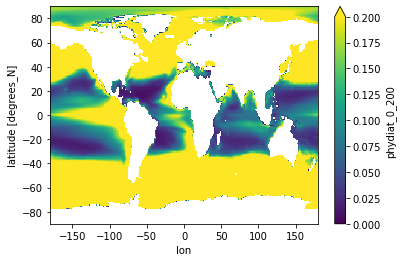

In [14]:
ds_hist.mean(dim=('time')).phydiat_0_200.plot(vmin=0, vmax=0.2)

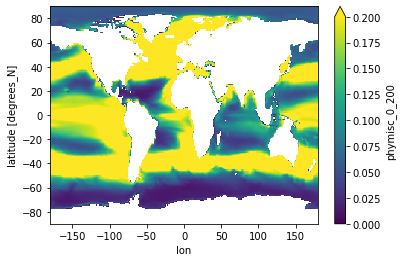

In [15]:
ds_hist.mean(dim=('time')).phymisc_0_200.plot(vmin=0, vmax=0.2)

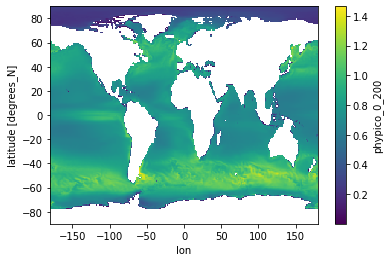

In [16]:
ds_hist.mean(dim=('time')).phypico_0_200.plot()

## Step 1b. Compute total global carbon

In [17]:

area_path = '/work/m1c/GFDL_files/ocean_cobalt_omip_tracers_month_z_1x1deg.static.nc'
area_grid = xr.open_dataset(area_path)
# coordinates need to match with the previous files
area_grid.coords['lon'] = (area_grid.coords['lon'] + 180) % 360 - 180
area_grid = area_grid.sortby(area_grid.lon)
#area_grid = area_grid.sortby(area_grid.lat) 


area_grid

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    areacello  (lat, lon) float32 ...
    deptho     (lat, lon) float32 ...
    geolat     (lat, lon) float32 ...
    geolon     (lat, lon) float32 ...
    hfgeou     (lat, lon) float32 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    sftof      (lat, lon) float32 ...
    wet        (lat, lon) float32 ...
Attributes:
    filename:                   ocean_cobalt_omip_tracers_month_z_1x1deg.stat...
    title:                      OMp5_IAF_BLING_baseline
    grid_type:                  regular
    grid_tile:                  N/A
    history:                    fregrid --standard_dimension --input_mosaic o...
    history_of_appended_files:  Thu Jan 31 02:22:00 2019: Appended file 18540...
    NCO:                        "4.6.4"
    code_version:               $Name: bronx-10_performance_z1l $
    external_variables:         areacello areacello

In [18]:
# dictionary with total carbon

total_carbon_gC={}
total_carbon_gC['globalSum_gC']={}
    
for i in varlist:
    total_carbon_gC['globalSum_gC'][i] = (ds_hist[i + '_0_200'].mean(dim='time') * area_grid.areacello).sum(dim=['lon','lat']).values # conversion to g C already happened
total_carbon_gC

{'globalSum_gC': {'phypico': array(2.4719441e+14, dtype=float32),
  'phymisc': array(5.3708524e+13, dtype=float32),
  'phydiat': array(8.943884e+13, dtype=float32),
  'zmeso': array(2.6447617e+14, dtype=float32),
  'zmicro': array(1.9777517e+14, dtype=float32)}}

In [19]:
# transform the dictionary to a dataframe
biomass=pd.DataFrame.from_dict(total_carbon_gC)
biomass=biomass.reset_index()
biomass.columns.values[0]='name'
biomass

,name,globalSum_gC
0,phydiat,89438840000000.0
1,phymisc,53708524000000.0
2,phypico,247194410000000.0
3,zmeso,264476170000000.0
4,zmicro,197775170000000.0


## Step3: complete table with size classes 

In [20]:
sizes=np.linspace(np.log10(0.5),np.log10(20.*1000.),num=1000,endpoint=False)
#10**(sizes)
#sizes

In [21]:
dd=np.diff(sizes)[0]
sizes_min=10**(sizes-dd/2)
sizes_max=10**(sizes+dd/2)
size_range=[str(np.round(10**s,3))+': '+'['+str(np.round(x,3))+','+str(np.round(y,3))+')' for s,x,y in zip(sizes,sizes_min,sizes_max)]
#size_range

In [22]:
sizedf=pd.DataFrame([10**sizes]).transpose()
sizedf.columns=['sizes']
sizedf['phyto']= None
sizedf['phytomisc']= None
sizedf['zoo']= None
sizedf.loc[(sizedf.sizes > 0.5) & (sizedf.sizes < 10),'phyto']='phypico'
sizedf.loc[(sizedf.sizes > 10) & (sizedf.sizes < 100),'phyto']='phydiat'
#sizedf.loc[(sizedf.sizes > 10) & (sizedf.sizes < 100),'phyto']='phylarge' # 12/19/2022 change sizes in phydiat and phymisc for them to match the other models (sizedf.sizes > 10) & (sizedf.sizes < 200)
sizedf.loc[(sizedf.sizes > 10) & (sizedf.sizes < 100),'phytomisc']='phymisc'
#sizedf.loc[(sizedf.sizes > 5) & (sizedf.sizes < 22),'phyto']='phydiaz' # reference here, double check this
sizedf.loc[(sizedf.sizes > 10) & (sizedf.sizes < 200),'zoo']='zmicro'
sizedf.loc[(sizedf.sizes > 200) & (sizedf.sizes < 20000),'zoo']='zmeso' #updated 12/12/2022, zmeso is large and medium zoo
len(sizedf)

sizedf = sizedf.reset_index(drop=True)

sizedf

,sizes,phyto,phytomisc,zoo
0,0.500000,None,None,None
1,0.505326,phypico,None,None
2,0.510710,phypico,None,None
3,0.516150,phypico,None,None
4,0.521649,phypico,None,None
...,...,...,...,...
995,18967.919408,None,None,zmeso
996,19169.984234,None,None,zmeso
997,19374.201652,None,None,zmeso
998,19580.594595,None,None,zmeso


In [23]:
# determine the degree of overlap between size bins. In COBALT (and perhaps other models) the degree of overlap might need to be determined following 
# Jessica's method

# the goal is to have repeated entries for a size class if it occurs across plantkon types:
sdfm = pd.melt(sizedf, id_vars='sizes',var_name='type',value_name='name')
sdfm = sdfm.dropna().reset_index(drop=True)
pd.set_option('display.max_rows',80)
sdfm

,sizes,type,name
0,0.505326,phyto,phypico
1,0.510710,phyto,phypico
2,0.516150,phyto,phypico
3,0.521649,phyto,phypico
4,0.527206,phyto,phypico
...,...,...,...
1428,18967.919408,zoo,zmeso
1429,19169.984234,zoo,zmeso
1430,19374.201652,zoo,zmeso
1431,19580.594595,zoo,zmeso


In [24]:
# assign biovolume and amount of acrbon to each size bin
import math

sdfm['biovolume_um3']=(4/3)*math.pi*(sdfm.sizes/2)**3

sdfm['mg_carbon']=0

sdfm.loc[sdfm.name=='phypico','mg_carbon']=10**(-0.583 +0.860 * np.log10(sdfm.loc[sdfm.name=='phypico','biovolume_um3'])) * 1e-9

#non-diatoms, Menden-Deuer and Lessard 2000, double check these with Jessica, to ask if might be appropiate to use dinoflagellate fits
#also, why 0.216?? notice phymisc as non diatoms

# phymisc, which are non diatoms, treated as protists, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp=sdfm.loc[(sdfm.name=='phymisc') & (sdfm.biovolume_um3 < 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='phymisc') & (sdfm.biovolume_um3 < 3000),'mg_carbon']=10**(-0.583 + 0.860 * np.log10(tmp)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp=sdfm.loc[(sdfm.name=='phymisc') & (sdfm.biovolume_um3 >= 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='phymisc') & (sdfm.biovolume_um3 >= 3000),'mg_carbon']=10**(-0.665 + 0.939 * np.log10(tmp)) * 1e-9


# zmicro, treated as protists, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp=sdfm.loc[(sdfm.name=='zmicro') & (sdfm.biovolume_um3 < 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='zmicro') & (sdfm.biovolume_um3 < 3000),'mg_carbon']=10**(-0.583 + 0.860 * np.log10(tmp)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp=sdfm.loc[(sdfm.name=='zmicro') & (sdfm.biovolume_um3 >= 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='zmicro') & (sdfm.biovolume_um3 >= 3000),'mg_carbon']=10**(-0.665 + 0.939 * np.log10(tmp)) * 1e-9


#sdfm.loc[sdfm.name=='phymisc','mg_carbon']=0.216 * sdfm.loc[sdfm.name=='phymisc','biovolume_um3']**0.939 * 1e-9
#sdfm.loc[sdfm.name=='zmicro','mg_carbon']=0.216 * sdfm.loc[sdfm.name=='zmicro','biovolume_um3']**0.939 * 1e-9



# diatoms, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp=sdfm.loc[(sdfm.name=='phydiat') & (sdfm.biovolume_um3 <= 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='phydiat') & (sdfm.biovolume_um3 <= 3000),'mg_carbon']=10**(-0.541 + 0.811 * np.log10(tmp)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp=sdfm.loc[(sdfm.name=='phydiat') & (sdfm.biovolume_um3 > 3000),'biovolume_um3']
sdfm.loc[(sdfm.name=='phydiat') & (sdfm.biovolume_um3 > 3000),'mg_carbon']=10**(-0.933 + 0.881 * np.log10(tmp)) * 1e-9

# mesozooplankton, Pitt et al. 2013 will be deprecated, we will use Kiorboe/Maas combo
#sdfm.loc[sdfm.name=='zmeso','mg_carbon']= 0.06281 * (sdfm.loc[sdfm.name=='zmeso','sizes']/1e3)**3
sdfm.loc[sdfm.name=='zmeso','mg_carbon'] = 0.055 * (sdfm.loc[sdfm.name=='zmeso','biovolume_um3']/1e9) # Maas et al. takes milimeters cubed (notice conversion) and returns dry mass in mg
sdfm.loc[sdfm.name=='zmeso','mg_carbon'] = 10**((np.log10(sdfm.loc[sdfm.name=='zmeso','mg_carbon'])-(-0.67))/0.96) # Kiorboe et al. takes dry mass in mg to wet mass in mg
sdfm.loc[sdfm.name=='zmeso','mg_carbon'] = (10**((0.95*np.log10(sdfm.loc[sdfm.name=='zmeso','mg_carbon']))-0.93))# Kiorboe et al. takes wet mass  and returns mass of carbon

len(sdfm)
sdfm

,sizes,type,name,biovolume_um3,mg_carbon
0,0.505326,phyto,phypico,6.756392e-02,2.573681e-11
1,0.510710,phyto,phypico,6.974627e-02,2.645014e-11
2,0.516150,phyto,phypico,7.199912e-02,2.718325e-11
3,0.521649,phyto,phypico,7.432473e-02,2.793667e-11
4,0.527206,phyto,phypico,7.672547e-02,2.871098e-11
...,...,...,...,...,...
1428,18967.919408,zoo,zmeso,3.573203e+12,1.005892e+02
1429,19169.984234,zoo,zmeso,3.688620e+12,1.038039e+02
1430,19374.201652,zoo,zmeso,3.807764e+12,1.071214e+02
1431,19580.594595,zoo,zmeso,3.930757e+12,1.105449e+02


## define the linear regressions for the PFTs that can use more than one allomentric relations due to its size range. For GFDL these are phymisc, phydiat and  zmicro:

## first, phymisc

In [25]:
df_phymisc = sdfm.loc[sdfm.name=='phymisc'].reset_index()
df_phymisc['pg_carbon'] = df_phymisc['mg_carbon']*1e9
df_phymisc

,index,sizes,type,name,biovolume_um3,mg_carbon,pg_carbon
0,499,10.031202,phytomisc,phymisc,528.515305,5.738911e-08,57.389112
1,500,10.138064,phytomisc,phymisc,545.586666,5.897974e-08,58.979736
2,501,10.246065,phytomisc,phymisc,563.209443,6.061445e-08,60.614446
3,502,10.355216,phytomisc,phymisc,581.401446,6.229446e-08,62.294464
4,503,10.465530,phytomisc,phymisc,600.181062,6.402105e-08,64.021046
...,...,...,...,...,...,...,...
212,711,94.839597,phytomisc,phymisc,446650.395044,4.368373e-05,43683.727708
213,712,95.849921,phytomisc,phymisc,461077.471017,4.500738e-05,45007.376076
214,713,96.871008,phytomisc,phymisc,475970.550208,4.637113e-05,46371.131942
215,714,97.902973,phytomisc,phymisc,491344.684799,4.777621e-05,47776.210591


In [26]:
slope_phymisc, intercept_phymisc, r_value_phymisc, p_value_phymisc, std_err_phymisc = linregress(x=np.log10(df_phymisc.biovolume_um3),y=np.log10(df_phymisc.pg_carbon))

In [27]:
slope_phymisc

0.9993205685783716

In [28]:
intercept_phymisc

-0.9604028271376519

## now , phydiat

In [29]:
df_phydiat = sdfm.loc[sdfm.name=='phydiat'].reset_index()
df_phydiat['pg_carbon'] = df_phydiat['mg_carbon']*1e9
df_phydiat

,index,sizes,type,name,biovolume_um3,mg_carbon,pg_carbon
0,282,10.031202,phyto,phydiat,528.515305,4.649430e-08,46.494297
1,283,10.138064,phyto,phydiat,545.586666,4.770858e-08,47.708581
2,284,10.246065,phyto,phydiat,563.209443,4.895458e-08,48.954578
3,285,10.355216,phyto,phydiat,581.401446,5.023312e-08,50.233117
4,286,10.465530,phyto,phydiat,600.181062,5.154505e-08,51.545046
...,...,...,...,...,...,...,...
212,494,94.839597,phyto,phydiat,446650.395044,1.108209e-05,11082.087209
213,495,95.849921,phyto,phydiat,461077.471017,1.139685e-05,11396.849362
214,496,96.871008,phyto,phydiat,475970.550208,1.172055e-05,11720.551637
215,497,97.902973,phyto,phydiat,491344.684799,1.205345e-05,12053.447959


In [30]:
slope_phydiat, intercept_phydiat, r_value_phydiat, p_value_phydiat, std_err_phydiat = linregress(x=np.log10(df_phydiat.biovolume_um3),y=np.log10(df_phydiat.pg_carbon))

In [31]:
slope_phydiat

0.8134330557810308

In [32]:
intercept_phydiat

-0.6038355293935673

## now zmicro

In [33]:
df_zmicro = sdfm.loc[sdfm.name=='zmicro'].reset_index()
df_zmicro['pg_carbon'] = df_zmicro['mg_carbon']*1e9
df_zmicro

,index,sizes,type,name,biovolume_um3,mg_carbon,pg_carbon
0,716,10.031202,zoo,zmicro,5.285153e+02,5.738911e-08,57.389112
1,717,10.138064,zoo,zmicro,5.455867e+02,5.897974e-08,58.979736
2,718,10.246065,zoo,zmicro,5.632094e+02,6.061445e-08,60.614446
3,719,10.355216,zoo,zmicro,5.814014e+02,6.229446e-08,62.294464
4,720,10.465530,zoo,zmicro,6.001811e+02,6.402105e-08,64.021046
...,...,...,...,...,...,...,...
278,994,190.864720,zoo,zmicro,3.640622e+06,3.132881e-04,313288.092942
279,995,192.897998,zoo,zmicro,3.758216e+06,3.227809e-04,322780.947483
280,996,194.952936,zoo,zmicro,3.879609e+06,3.325614e-04,332561.442344
281,997,197.029765,zoo,zmicro,4.004923e+06,3.426383e-04,342638.293234


In [34]:
slope_zmicro, intercept_zmicro, r_value_zmicro, p_value_zmicro, std_err_zmicro = linregress(x=np.log10(df_zmicro.biovolume_um3),y=np.log10(df_zmicro.pg_carbon))

In [35]:
slope_zmicro

0.9775099616755151

In [36]:
intercept_zmicro

-0.876425984221672

## use the innformation from the linear regression to create the carbon to biovolume conversion function

In [37]:

def g_carbon_to_biovol(x, v): # allometric relations based on Menden-Deuder and Lessard() for phymisc, zmicro and phydiat,  and Pitt et al. for zmeso. takes grams, converts to picograms
    if v =='phypico':
        x_biovol = 10**((np.log10(x*1e12)-(-0.583))/0.860)
    elif v =='phymisc':
        x_biovol = 10**((np.log10(x*1e12)-(intercept_phymisc))/slope_phymisc)
        
    elif v == 'zmicro':
        x_biovol = 10**((np.log10(x*1e12)-(intercept_zmicro))/slope_zmicro)
        
    elif v == 'phydiat':
        x_biovol = 10**((np.log10(x*1e12)-(intercept_phydiat))/slope_phydiat)


    elif v == 'zmeso':
        #x_micrometers = (10**((0.33*np.log10(x))-0.6))*10000 # to  ESD in micrometers. Notice that allometric relations for Pitt et al have on the y variable cm and the x variable carbon in grams
        #x_micrometers = 10**((np.log10(x*1e6)-(-0.698))/2.476)# This relationship is for Acartia tonsa from Mauchline (1999) grams of carbon converted to micrograms
        #x_micrometers = 10**((np.log10(x*1e6)-(-5.58))/2.23) # relationship from Rodriguez & Mullin (1986), Takes micrograms and returrs micrometers, does not work, over estimation of meso biomass
        #x_biovol=(4/3)*math.pi*(x_micrometers/2)**3 #from mcirometers to micrometers cubed
        
        #the next approach uses three equations: two from Kiorboe et al. (2013), to go from carbom mass to wet mass and finally to dry mass, and then from Maas et al. 2021 from dry mass to biovolume
        wet_mass = 10**((np.log10(x*1000)-(-0.93))/0.95) # takes miligrams of carbon and returns miligrams of wet weight Kiorboe et al. (2013)
        dry_mass = (10**((0.96*np.log10(wet_mass))-0.67))# takes miligrams of wet mass and returns miligrams of dry mass Kiorboe et al. (2013)
        x_biovol = ((dry_mass)/0.055)*1e9 #Maas et al (2021) appears to set the intercept to 0 and does not use a logarithmic function to relate these variables. Original equation: dry mass = 0.055*biovolume +0. This also includes conversion from mm3 to um3
        #x_biovol = 10**((np.log10(x*1e12)-(-0.665))/0.939)
    return x_biovol

## Now using this information, one can calculate the global sum of biovolume from the models

In [38]:
global_um3_list = []
for n, v in enumerate(biomass.name.unique()):
    global_um3_list.append(g_carbon_to_biovol(biomass.globalSum_gC[n], v))
biomass['globalSum_um3'] = global_um3_list

In [39]:
biomass

,name,globalSum_gC,globalSum_um3
0,phydiat,89438840000000.0,4.426212e+32
1,phymisc,53708524000000.0,5.112022e+26
2,phypico,247194410000000.0,2.330702e+31
3,zmeso,264476170000000.0,1.365233e+28
4,zmicro,197775170000000.0,6.277268e+27


## Step 3. pull together and merge the overlapping size bins. The total global biovolume is split by the size bins


In [40]:

sdfm['globalSum_um3_split']=0
for s in sdfm.name.unique():
    n=len(sdfm.loc[sdfm.name==s].index)
    print(s, n)
    sdfm.loc[sdfm.name==s,'globalSum_um3_split'] = np.tile(biomass.loc[biomass.name==s,'globalSum_um3']/n,n)
sdfm

phypico 282
phydiat 217
phymisc 217
zmicro 283
zmeso 434


,sizes,type,name,biovolume_um3,mg_carbon,globalSum_um3_split
0,0.505326,phyto,phypico,6.756392e-02,2.573681e-11,8.264902e+28
1,0.510710,phyto,phypico,6.974627e-02,2.645014e-11,8.264902e+28
2,0.516150,phyto,phypico,7.199912e-02,2.718325e-11,8.264902e+28
3,0.521649,phyto,phypico,7.432473e-02,2.793667e-11,8.264902e+28
4,0.527206,phyto,phypico,7.672547e-02,2.871098e-11,8.264902e+28
...,...,...,...,...,...,...
1428,18967.919408,zoo,zmeso,3.573203e+12,1.005892e+02,3.145699e+25
1429,19169.984234,zoo,zmeso,3.688620e+12,1.038039e+02,3.145699e+25
1430,19374.201652,zoo,zmeso,3.807764e+12,1.071214e+02,3.145699e+25
1431,19580.594595,zoo,zmeso,3.930757e+12,1.105449e+02,3.145699e+25


In [41]:
sdfm = sdfm.sort_values(by='biovolume_um3', ascending=True)

In [42]:
small_increment_biovol = (sdfm['biovolume_um3'][1]-sdfm['biovolume_um3'][0])/2 # small increment is used to define the maximum and minimum of the size range

In [43]:
# create log-spaced bins for mg_carbon
bins_biovol = np.logspace(np.log10(sdfm['biovolume_um3'].min()-small_increment_biovol), np.log10(sdfm['biovolume_um3'].max()+small_increment_biovol), 51)


# use pandas.cut to bin the data into log-spaced bins
sdfm['biovolume_um3_bin'] = pd.cut(sdfm['biovolume_um3'], bins=bins_biovol, include_lowest=False)
sdfm['bin_centers_biovol'] = sdfm['biovolume_um3_bin'].apply(lambda x:x.mid).astype(float) # this gets the mid point 
sdfm['bin_range_biovol'] = sdfm['biovolume_um3_bin'].apply(lambda x:x.length).astype(float)

#len(sdfm)

In [44]:
sdfm.head()

,sizes,type,name,biovolume_um3,mg_carbon,globalSum_um3_split,biovolume_um3_bin,bin_centers_biovol,bin_range_biovol
0,0.505326,phyto,phypico,0.067564,2.573681e-11,8.264902e+28,"(0.0665, 0.125]",0.09575,0.0585
1,0.510710,phyto,phypico,0.069746,2.645014e-11,8.264902e+28,"(0.0665, 0.125]",0.09575,0.0585
2,0.516150,phyto,phypico,0.071999,2.718325e-11,8.264902e+28,"(0.0665, 0.125]",0.09575,0.0585
3,0.521649,phyto,phypico,0.074325,2.793667e-11,8.264902e+28,"(0.0665, 0.125]",0.09575,0.0585
4,0.527206,phyto,phypico,0.076725,2.871098e-11,8.264902e+28,"(0.0665, 0.125]",0.09575,0.0585


In [45]:
len(sdfm)

1433

In [46]:
df_grouped_biovol = sdfm.groupby([ 'name', 'biovolume_um3_bin','bin_centers_biovol', 'bin_range_biovol']).agg(biovolume_um3=('biovolume_um3','mean'), globalSum_um3=('globalSum_um3_split','sum'),
                                                                                                             sizes=('sizes','mean'))


df_grouped_biovol = df_grouped_biovol.dropna().sort_values(by = ['sizes']).reset_index()
df_grouped_biovol['NB'] = df_grouped_biovol.globalSum_um3/df_grouped_biovol.bin_range_biovol
df_grouped_biovol.sizes = df_grouped_biovol.sizes.round(1)
df_grouped_biovol



,name,biovolume_um3_bin,bin_centers_biovol,bin_range_biovol,biovolume_um3,globalSum_um3,sizes,NB
0,phypico,"(0.0665, 0.125]",9.575000e-02,5.850000e-02,9.292781e-02,1.652980e+30,0.6,2.825607e+31
1,phypico,"(0.125, 0.237]",1.810000e-01,1.120000e-01,1.754968e-01,1.652980e+30,0.7,1.475875e+31
2,phypico,"(0.237, 0.446]",3.415000e-01,2.090000e-01,3.314308e-01,1.652980e+30,0.9,7.908997e+30
3,phypico,"(0.446, 0.842]",6.440000e-01,3.960000e-01,6.259166e-01,1.652980e+30,1.1,4.174193e+30
4,phypico,"(0.842, 1.589]",1.215500e+00,7.470000e-01,1.182062e+00,1.652980e+30,1.3,2.212825e+30
5,phypico,"(1.589, 2.999]",2.294000e+00,1.410000e+00,2.232357e+00,1.652980e+30,1.6,1.172326e+30
6,phypico,"(2.999, 5.658]",4.328500e+00,2.659000e+00,4.215871e+00,1.652980e+30,2.0,6.216549e+29
7,phypico,"(5.658, 10.674]",8.166000e+00,5.016000e+00,7.961793e+00,1.652980e+30,2.5,3.295415e+29
8,phypico,"(10.674, 20.14]",1.540700e+01,9.466000e+00,1.503608e+01,1.652980e+30,3.1,1.746229e+29
9,phypico,"(20.14, 37.999]",2.906950e+01,1.785900e+01,2.839606e+01,1.652980e+30,3.8,9.255727e+28


In [47]:
bin_info = pd.DataFrame({
    'biovolume_um3_bin': np.sort(sdfm['biovolume_um3_bin'].unique()),
    'biovolume_um3_range': np.sort(sdfm['bin_range_biovol'].unique()),
    'bin_centers_biovol': np.sort(sdfm['bin_centers_biovol'].unique())})

In [48]:
bin_info

,biovolume_um3_bin,biovolume_um3_range,bin_centers_biovol
0,"(0.0665, 0.125]",5.850000e-02,9.575000e-02
1,"(0.125, 0.237]",1.120000e-01,1.810000e-01
2,"(0.237, 0.446]",2.090000e-01,3.415000e-01
3,"(0.446, 0.842]",3.960000e-01,6.440000e-01
4,"(0.842, 1.589]",7.470000e-01,1.215500e+00
5,"(1.589, 2.999]",1.410000e+00,2.294000e+00
6,"(2.999, 5.658]",2.659000e+00,4.328500e+00
7,"(5.658, 10.674]",5.016000e+00,8.166000e+00
8,"(10.674, 20.14]",9.466000e+00,1.540700e+01
9,"(20.14, 37.999]",1.785900e+01,2.906950e+01


In [49]:
# removing data from mediterranean and black sea
#biovolume_all.loc[dict(lat=biovolume_all.coords['lat'][(biovolume_all.coords['lat'] >= 30.5) & (biovolume_all.coords['lat'] <= 47.5)],
                                        #lon=biovolume_all.coords['lon'][(biovolume_all.coords['lon'] >= -5.5) & (biovolume_all.coords['lon'] <= 55.5)])]=float('nan') #

## Calculate  total biomass and normalized biomass per size class

In [50]:
lat = ds_hist.lat
lon = ds_hist.lon
time = ds_hist.time
biovol_um3 = bin_info['bin_centers_biovol']
data = np.zeros((len(biovol_um3), len(time), len(lat), len(lon)))
biovolume_all = xr.DataArray(data, coords={'biovol_um3':biovol_um3, 'time':time, 'lat':lat, 'lon':lon},
            dims = ['biovol_um3', 'time', 'lat', 'lon'])


lat_NB = ds_hist.lat
lon_NB = ds_hist.lon
time_NB = ds_hist.time
biovol_um3_NB = bin_info['bin_centers_biovol']
data_NB = np.zeros((len(biovol_um3_NB), len(time_NB), len(lat_NB), len(lon_NB)))
biovolume_all_NB = xr.DataArray(data_NB, coords={'biovol_um3':biovol_um3_NB, 'time':time_NB, 'lat':lat_NB, 'lon':lon_NB},
            dims = ['biovol_um3', 'time', 'lat', 'lon'])

#time = ds.time
#data = np.zeros((len(time), len(mmolC), len(z_t_150m), len(nlat), len(nlon)))
#biomass_all = xr.DataArray(data, coords={'time':time, 'mass_mmolC':mmolC, 'z_t_150m':z_t_150m, 'nlat':nlat, 'nlon':nlon},
#            dims = ['time', 'mass_mmolC', 'z_t_150m', 'nlat', 'nlon'])




biovolume_all.shape

(50, 360, 180, 360)

In [51]:
biovolume_all_NB.shape

(50, 360, 180, 360)

In [52]:
def size_spectra(data_array,dataset, NB=False):
    for v in df_grouped_biovol['name'].unique():
        print(v)
        cobaltvar = v +'_0_200' # REMEMBER: it has to be with the integrated data variables, to remove depth dimensions
        x = dataset[cobaltvar]#.mean(dim='time') # average by time
        x = x.values * carbon_molar_mass # to g C
        x = g_carbon_to_biovol(x, v)

    
        # split up 
        n_split = len(df_grouped_biovol.loc[df_grouped_biovol.name==v].index)

        um_biovolume = df_grouped_biovol.loc[df_grouped_biovol.name==v,'bin_range_biovol'].values
        x_split = x / n_split

    
        x_rep = np.repeat(x_split[np.newaxis,...], n_split, axis=0)
    
        if NB==True:
            x_rep = x_rep / (um_biovolume[:,None,None,None]) # normalized biomass = integrated biomass / size-class

        # units are : um3 / m^2 / um3 ind-1

        print(np.nanmax(x_rep))
        # extract the indices corresponding to the bins where the plankton groups fall
        pft_bins=pd.unique(df_grouped_biovol.where(df_grouped_biovol.name==v).dropna().bin_centers_biovol)
        subset = bin_info[bin_info['bin_centers_biovol'].isin(pft_bins)]
        index_dims = subset.index.values
    
        # check lengths are the same
        if (n_split != len(index_dims)):
            print("Error: Dimension lengths are not the same")
            break
        #normalized biovolume
        biovolume_vals = data_array[index_dims,:,:,:].values
        biovolume_vals = biovolume_vals + x_rep
        # put into matrix
        data_array.values[index_dims,:,:,:] = biovolume_vals
    return(data_array)

In [53]:
biovolume_all = size_spectra(biovolume_all, ds_hist, NB=False)

phypico
4929310300000000.0
zmicro
84140460000000.0
phydiat
7.002046e+16
phymisc
38064345000000.0
zmeso
135159560000000.0


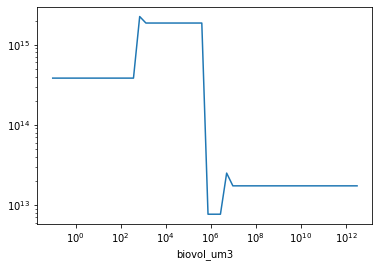

In [54]:
biovolume_all.mean(dim=('lat', 'lon', 'time')).plot()
plt.xscale('log')
plt.yscale('log')

## Get the total biovolume for only the size range included in PSSdb UVP+Zooscan

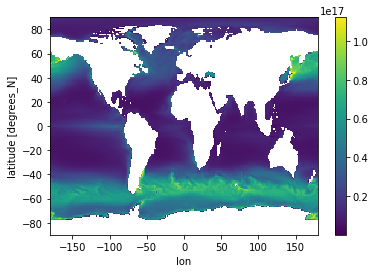

In [55]:
biovol_mask = ~np.isnan(biovolume_all.mean(dim=('biovol_um3')))
biovolume_all_subset= biovolume_all.where((biovolume_all['biovol_um3']>826400.0) & (biovolume_all['biovol_um3']<49100000000000.0)).sum(dim=['biovol_um3'])
biovolume_all= biovolume_all.sum(dim=['biovol_um3'])
biovolume_all = biovolume_all.where(biovol_mask)
biovolume_all_subset = biovolume_all_subset.where(biovol_mask)
biovolume_all.mean(dim=('time')).plot()

                

In [56]:
biovolume_all.shape

(360, 180, 360)

In [57]:
biovolume_all_NB = size_spectra(biovolume_all_NB, ds_hist, NB=True)

phypico
8.426171527006962e+16
zmicro
197053478977.38837
phydiat
163985032505600.94
phymisc
89145126016.32344
zmeso
43696595.508509405


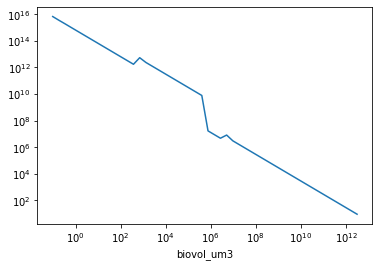

In [58]:
biovolume_all_NB.mean(dim=('lat', 'lon', 'time')).plot()
plt.xscale('log')
plt.yscale('log')

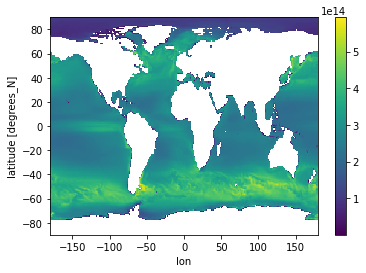

In [59]:
biovolume_all_NB.mean(dim=('time', 'biovol_um3')).plot()

In [60]:
biovolume_all_NB.shape

(50, 360, 180, 360)

In [61]:
def calculate_size_spectra_slopes(data):
    data.values=np.log10(data.values)
    data = data.assign_coords(biovol_um3=np.log10(data.biovol_um3))
    cov_x = (data.biovol_um3.values - data.biovol_um3.mean().values)[:,None,None,None]
    cov_y = (data.values - data.mean(dim='biovol_um3').values[None,:,:,:])
    cov_xy = cov_x * cov_y
    covariance = np.nansum(cov_xy,axis=0)

    #variance = (data.mass_mgC.values.var() * (len(data.mass_mgC.values) - 1.))
    variance = np.nansum(cov_x**2, axis=0)

    betas = covariance / variance
    intercept_log = data.mean(dim='biovol_um3').values - (betas * data.biovol_um3.mean().values)
    intercept = 10**(data.mean(dim='biovol_um3').values - (betas * data.biovol_um3.mean().values))
    #print(betas.shape)
    #print(intercept.shape)
    #print(data.mass_mgC.values[:, None,None].shape)
    Y_pred = betas*(data.biovol_um3.values[:, None,None,None])+intercept_log
    ss_res = np.nansum((data.values - Y_pred)**2, axis = 0)
    ss_tot = np.nansum((cov_y)**2, axis = 0)
    R2 = 1-(ss_res/ss_tot)
    RMSE = (ss_res/data.biovol_um3.values.shape[0])**0.5
    #print(Y_pred.shape)
    #ss_tot = (data.values - data.mean(dim='mass_mgC').values[None,:,:])**2
    #ss_res = (data.values-Y_pred)
    #R2 = 1 - (ss_res / ss_tot)
    
    
    
    #betas = -betas # convention
    betas[betas == 0] = np.nan
    intercept[intercept ==0] = np.nan
    R2[R2 ==0] = np.nan
    RMSE[RMSE ==0] = np.nan
    
    
    return betas, intercept, R2, RMSE

In [62]:
betas_hist, intercept_hist, R2_hist, RMSE_hist = calculate_size_spectra_slopes(biovolume_all_NB)
betas_hist.shape

(360, 180, 360)

In [63]:
np.nanmean(betas_hist)

-1.1452044856859842

In [64]:
np.nanmax(betas_hist)

-0.9028641274600345

In [65]:
np.nanmin(betas_hist)

-1.3812925453496234

In [66]:
np.nanmean(intercept_hist)

1286248521862659.0

In [67]:
np.nanmax(intercept_hist)

3.3920840438332044e+16

In [68]:
np.nanmin(intercept_hist)

136977010.14331722

In [69]:
biovolume_all_NB.values=10**(biovolume_all_NB.values)

In [70]:
#phypico=g_carbon_to_biovol(((ds_hist.phypico_0_200.values)*carbon_molar_mass), 'phypico')
#phymisc=g_carbon_to_biovol(((ds_hist.phymisc_0_200.values)*carbon_molar_mass), 'phymisc')
#phydiat=g_carbon_to_biovol(((ds_hist.phydiat_0_200.values)*carbon_molar_mass), 'phydiat')
#zmicro=g_carbon_to_biovol(((ds_hist.zmicro_0_200.values)*carbon_molar_mass), 'zmicro')
#zmeso=g_carbon_to_biovol(((ds_hist.zmeso_0_200.values)*carbon_molar_mass), 'zmeso')



## Get the slopes for each biome

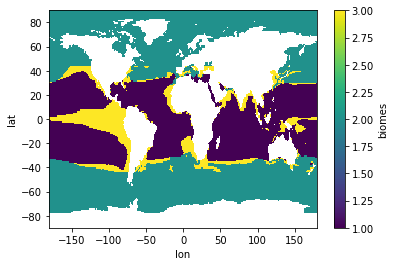

In [71]:
# load the biome mask
biome_mask = '/work/jyl/proj/CMIP6_models/ESM_Biomes/GFDL_historical_biomes_x1.nc'
biomes_hist = xr.open_dataset(biome_mask)
biomes_mask = ~np.isnan(biomes_hist.biomes)
biomes_hist['biomes'] = biomes_hist['biomes'].where((biomes_hist['lat'] < 44.5) & (biomes_hist['lat'] > -44.5), 2)
biomes_hist = biomes_hist.where(biomes_mask)
#biomes_hist = biomes_hist.assign_coords(lat=(biomes_hist.lat * -1))
biomes_hist.biomes.plot()

In [72]:
biomes_hist

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    biomes   (lat, lon) float64 nan nan nan nan nan nan ... 2.0 2.0 2.0 2.0 2.0

In [73]:

# add slopes to the biomes dataset
biomes_hist['chl'] = (('time', 'lat', 'lon'), chl_hist.schl.values)
biomes_hist['chl'].attrs = {"units": 'kg m-3', 'Description': 'Surface Mass Concentration of Total Phytoplankton expressed as Chlorophyll in Sea Water'}

biomes_hist['NB'] = biovolume_all_NB
biomes_hist['NB'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'normalized biovolume for each size class'}

#biomes_hist['total_biovolume_hist_full'] = biovolume_all
biomes_hist['total_biovolume_hist'] = biovolume_all_subset#(('time', 'lat', 'lon'),biovolume_all.values)
biomes_hist['total_biovolume_hist'].attrs = {"units": 'um^3 ', 'Description': 'total biovolume from the size range of 116-2000 micrometers'}

biomes_hist['betas_hist'] = (('time', 'lat', 'lon'), betas_hist)
biomes_hist['betas_hist'].attrs = {"units": 'm^-2 m^-3', 'Description': 'Normalized biovolume size spectra slope'}

biomes_hist['intercept_hist'] = (('time', 'lat', 'lon'), intercept_hist)
biomes_hist['intercept_hist'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'Normalized biovolume size spectra intercept'}

biomes_hist['R2_hist'] = (('time', 'lat', 'lon'), R2_hist)
biomes_hist['R2_hist'].attrs = { 'Description': 'Normalized biovolume coefficient of determination'}

biomes_hist['RMSE_hist'] = (('time', 'lat', 'lon'), RMSE_hist)
biomes_hist['RMSE_hist'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'Normalized biovolume size spectra Root mean square error'}

#original_biomass_variables
biomes_hist['phypico'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_hist.phypico_0_200.values*carbon_molar_mass, 'phypico'))
biomes_hist['phypico'].attrs = {"units": 'um^3', 'Description': 'picophytoplankton biovolume'}

biomes_hist['phymisc'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_hist.phymisc_0_200.values*carbon_molar_mass, 'phymisc'))
biomes_hist['phymisc'].attrs = {"units": 'um^3', 'Description': 'miscellaneous phytoplankton biovolume'}

biomes_hist['phydiat'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_hist.phydiat_0_200.values*carbon_molar_mass, 'phydiat'))
biomes_hist['phydiat'].attrs = {"units": 'um^3', 'Description': 'diatom biovolume'}

biomes_hist['zmicro'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_hist.zmicro_0_200.values*carbon_molar_mass, 'zmicro'))
biomes_hist['zmicro'].attrs = {"units": 'um^3', 'Description': 'microzooplankton biovolume'}

biomes_hist['zmeso'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_hist.zmeso_0_200.values*carbon_molar_mass, 'zmeso'))
biomes_hist['zmeso'].attrs = {"units": 'um^3', 'Description': 'mesozooplankton biovolume'}

biomes_hist['total_biovolume_full']=(('time', 'lat', 'lon'), biomes_hist.phypico.values+biomes_hist.phymisc.values+biomes_hist.phydiat.values+biomes_hist.zmicro.values+biomes_hist.zmeso.values)
biomes_hist['total_biovolume_full'].attrs = {"units": 'um^3', 'Description': 'all plankton biovolume'}
                                          
#percentage total
biomes_hist['phypico_per'] = (('time', 'lat', 'lon'), (biomes_hist.phypico.values/biomes_hist.total_biovolume_full.values)*100)
biomes_hist['phypico_per'].attrs = {'Description': 'picophytoplankton percentage of total biovolume'}  

biomes_hist['phymisc_per'] = (('time', 'lat', 'lon'), (biomes_hist.phymisc.values/biomes_hist.total_biovolume_full.values)*100)
biomes_hist['phymisc_per'].attrs = {'Description': 'miscellaneous phytoplankton percentage of total biovolume'}                                        
                                          
biomes_hist['phydiat_per'] = (('time', 'lat', 'lon'),(biomes_hist.phydiat.values/biomes_hist.total_biovolume_full.values)*100)
biomes_hist['phydiat_per'].attrs = {'Description': 'diatom percentage of total biovolume'}                                           
                                          
biomes_hist['zmicro_per'] = (('time', 'lat', 'lon'),(biomes_hist.zmicro.values/biomes_hist.total_biovolume_full.values)*100)
biomes_hist['zmicro_per'].attrs = {'Description': 'microzooplankton percentage of total biovolume'} 

biomes_hist['zmeso_per'] = (('time', 'lat', 'lon'),(biomes_hist.zmeso.values/biomes_hist.total_biovolume_full.values)*100)
biomes_hist['zmeso_per'].attrs = {'Description': 'mesozooplankton percentage of total biovolume'} 

#total biovolume
biomes_hist['phyc'] = (('time', 'lat', 'lon'), biomes_hist.phypico.values+biomes_hist.phymisc.values+biomes_hist.phydiat.values)
biomes_hist['phyc'].attrs = {"units": 'um^3', 'Description': 'phytoplankton biovolume'}

biomes_hist['zooc'] = (('time', 'lat', 'lon'), biomes_hist.zmicro.values+biomes_hist.zmeso.values)
biomes_hist['zooc'].attrs = {"units": 'um^3', 'Description': 'zooplankton biovolume'}

#biomes_hist['total_biovolume_hist']= (('time', 'lat', 'lon'), phypico+phydiat+zooc)
biomes_hist

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 1985-01-16 12:00:00 ... 2014-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 nan nan nan nan ... 2.0 2.0 2.0 2.0
    chl                   (time, lat, lon) float64 nan nan ... 1.845e-08
    NB                    (biovol_um3, time, lat, lon) float64 nan nan ... 3.639
    total_biovolume_hist  (time, lat, lon) float64 nan nan ... 1.542e+14
    betas_hist            (time, lat, lon) float64 nan nan ... -0.9686 -0.9686
    intercept_hist        (time, lat, lon) float64 nan nan ... 5.34e+12
    ...                    ...
    phymisc_per           (time, lat, lon) float32 nan nan ... 0.04696 0.04702
    phydiat_per           (time, lat, lon) float32 nan nan nan ... 35.66 35.68
    zmicro_per            (time, lat, lon) float32 nan nan nan ... 2.364 2.37
    zmeso_per             (time, lat, lon) float32 nan nan nan ... 49.31 49.28
    phyc                  (time, lat, lon) float32 nan nan ... 1.498e+14
    zooc                  (time, lat, lon) float32 nan nan ... 1.602e+14 1.6e+14

In [74]:
biomes_hist

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 1985-01-16 12:00:00 ... 2014-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 nan nan nan nan ... 2.0 2.0 2.0 2.0
    chl                   (time, lat, lon) float64 nan nan ... 1.845e-08
    NB                    (biovol_um3, time, lat, lon) float64 nan nan ... 3.639
    total_biovolume_hist  (time, lat, lon) float64 nan nan ... 1.542e+14
    betas_hist            (time, lat, lon) float64 nan nan ... -0.9686 -0.9686
    intercept_hist        (time, lat, lon) float64 nan nan ... 5.34e+12
    ...                    ...
    phymisc_per           (time, lat, lon) float32 nan nan ... 0.04696 0.04702
    phydiat_per           (time, lat, lon) float32 nan nan nan ... 35.66 35.68
    zmicro_per            (time, lat, lon) float32 nan nan nan ... 2.364 2.37
    zmeso_per             (time, lat, lon) float32 nan nan nan ... 49.31 49.28
    phyc                  (time, lat, lon) float32 nan nan ... 1.498e+14
    zooc                  (time, lat, lon) float32 nan nan ... 1.602e+14 1.6e+14

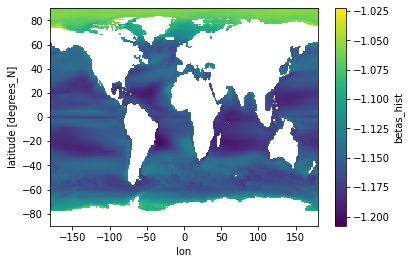

In [75]:
biomes_hist.mean(dim=('time')).betas_hist.plot()

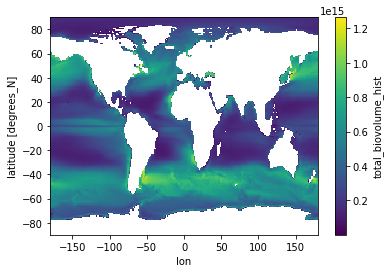

In [76]:
biomes_hist.mean(dim=('time')).total_biovolume_hist.plot()

In [77]:
biomes_hist.to_netcdf('/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc')

In [78]:
biomes_hist

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 1985-01-16 12:00:00 ... 2014-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 nan nan nan nan ... 2.0 2.0 2.0 2.0
    chl                   (time, lat, lon) float64 nan nan ... 1.845e-08
    NB                    (biovol_um3, time, lat, lon) float64 nan nan ... 3.639
    total_biovolume_hist  (time, lat, lon) float64 nan nan ... 1.542e+14
    betas_hist            (time, lat, lon) float64 nan nan ... -0.9686 -0.9686
    intercept_hist        (time, lat, lon) float64 nan nan ... 5.34e+12
    ...                    ...
    phymisc_per           (time, lat, lon) float32 nan nan ... 0.04696 0.04702
    phydiat_per           (time, lat, lon) float32 nan nan nan ... 35.66 35.68
    zmicro_per            (time, lat, lon) float32 nan nan nan ... 2.364 2.37
    zmeso_per             (time, lat, lon) float32 nan nan nan ... 49.31 49.28
    phyc                  (time, lat, lon) float32 nan nan ... 1.498e+14
    zooc                  (time, lat, lon) float32 nan nan ... 1.602e+14 1.6e+14

<h1><center> SAME PROCESS BUT FOR SSP5 8.5</center></h1>

## Pre step: combine the different files of the plankton into one netcdf file

In [79]:
# combine ssp5 data in one file and add variables by depth, and remove old datasets
ds_ssp585= xr.open_mfdataset('/work/m1c/GFDL_files/gfdl_ssp585_all_plankton_0-200_gr_monthly_2070_2100.nc')
#ds_hist=ds_hist.assign_coords(lon=(((ds_hist.lon + 180) % 360) - 180))
ds_ssp585['lon_adj'] = xr.where(ds_ssp585['lon'] > 180, ds_ssp585['lon'] - 360, ds_ssp585['lon'])
# reassign the new coords to as the main lon coords
# and sort DataArray using new coordinate values
ds_ssp585 = ds_ssp585.swap_dims({'lon': 'lon_adj'}).sel(**{'lon_adj': sorted(ds_ssp585.lon_adj)}).drop('lon')

ds_ssp585 = ds_ssp585.rename({'lon_adj': 'lon'})

ds_ssp585

<xarray.Dataset>
Dimensions:        (time: 360, z_l: 35, lat: 180, lon: 360, bnds: 2, z_i: 36)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) object 2071-01-16 12:00:00 ... 2100-12-16 12:00:00
  * z_i            (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l            (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * lon            (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables: (12/13)
    average_DT     (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    average_T1     (time) datetime64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    average_T2     (time) datetime64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    chl            (time, z_l, lat, lon) float32 dask.array<chunksize=(360, 35, 180, 360), meta=np.ndarray>
    lat_bnds       (time, lat, bnds) float64 dask.array<chunksize=(360, 180, 2), meta=np.ndarray>
    lon_bnds       (time, lon, bnds) float64 dask.array<chunksize=(360, 360, 2), meta=np.ndarray>
    ...             ...
    volcello       (time, z_l, lat, lon) float32 dask.array<chunksize=(360, 35, 180, 360), meta=np.ndarray>
    phydiat_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phypico_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phymisc_0_200  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmeso_0_200    (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmicro_0_200   (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z_1x1deg.207101-2072...
    title:               ESM4_ssp585_D1
    associated_files:    areacello: 20710101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    history:             fregrid --standard_dimension --input_mosaic ocean_mo...
    code_version:        $Name: bronx-10_performance_z1l $
    external_variables:  volcello areacello

In [80]:
del ds_ssp585.lat.attrs['long_name']
del ds_ssp585.lat.attrs['units']
del ds_ssp585.lat.attrs['axis']
del ds_ssp585.lat.attrs['bounds']

In [81]:
total_carbon_gC_ssp5={}
total_carbon_gC_ssp5['globalSum_gC']={}
    
for i in varlist:
    total_carbon_gC_ssp5['globalSum_gC'][i] = (ds_ssp585[i + '_0_200'].mean(dim = 'time') * area_grid.areacello).sum(dim=['lon','lat']).values # conversion to g C already happened
total_carbon_gC_ssp5

{'globalSum_gC': {'phypico': array(2.3210275e+14, dtype=float32),
  'phymisc': array(4.3811695e+13, dtype=float32),
  'phydiat': array(7.682833e+13, dtype=float32),
  'zmeso': array(2.2522953e+14, dtype=float32),
  'zmicro': array(1.8514148e+14, dtype=float32)}}

In [82]:
# transform the dictionary to a dataframe
biomass_ssp585=pd.DataFrame.from_dict(total_carbon_gC_ssp5)
biomass_ssp585=biomass_ssp585.reset_index()
biomass_ssp585.columns.values[0]='name'
biomass_ssp585

,name,globalSum_gC
0,phydiat,76828330000000.0
1,phymisc,43811695000000.0
2,phypico,232102750000000.0
3,zmeso,225229530000000.0
4,zmicro,185141480000000.0


In [83]:
global_um3_list = []
for n, v in enumerate(biomass_ssp585.name.unique()):
    global_um3_list.append(g_carbon_to_biovol(biomass_ssp585.globalSum_gC[n], v))
biomass_ssp585['globalSum_um3'] = global_um3_list

In [84]:
biomass_ssp585

,name,globalSum_gC,globalSum_um3
0,phydiat,76828330000000.0,3.671882e+32
1,phymisc,43811695000000.0,4.169456e+26
2,phypico,232102750000000.0,2.166081e+31
3,zmeso,225229530000000.0,1.160677e+28
4,zmicro,185141480000000.0,5.867364e+27


In [85]:
sizedf_ssp585=pd.DataFrame([10**sizes]).transpose()
sizedf_ssp585.columns=['sizes']
sizedf_ssp585['phyto']= None
sizedf_ssp585['phytomisc'] = None
sizedf_ssp585['zoo']= None
sizedf_ssp585.loc[(sizedf_ssp585.sizes > 0.5) & (sizedf_ssp585.sizes < 10),'phyto']='phypico'
sizedf_ssp585.loc[(sizedf_ssp585.sizes > 10) & (sizedf_ssp585.sizes < 100),'phyto']='phydiat'
sizedf_ssp585.loc[(sizedf_ssp585.sizes > 10) & (sizedf_ssp585.sizes < 100),'phytomisc']='phymisc'
#sizedf.loc[(sizedf.sizes > 5) & (sizedf.sizes < 22),'phyto']='phydiaz'
sizedf_ssp585.loc[(sizedf_ssp585.sizes > 10) & (sizedf_ssp585.sizes < 200),'zoo']='zmicro'
sizedf_ssp585.loc[(sizedf_ssp585.sizes > 200) & (sizedf_ssp585.sizes < 20000),'zoo']='zmeso'
#sizedf.loc[(sizedf.sizes > 2000) & (sizedf.sizes < 20000),'zoo']='lgz'
sizedf_ssp585

,sizes,phyto,phytomisc,zoo
0,0.500000,None,None,None
1,0.505326,phypico,None,None
2,0.510710,phypico,None,None
3,0.516150,phypico,None,None
4,0.521649,phypico,None,None
...,...,...,...,...
995,18967.919408,None,None,zmeso
996,19169.984234,None,None,zmeso
997,19374.201652,None,None,zmeso
998,19580.594595,None,None,zmeso


In [86]:
# determine the degree of overlap between size bins. In COBALT (and perhaps other models) the degree of overlap might need to be determined following 
# Jessica's method

# the goal is to have repeated entries for a size class if it occurs across plantkon types:
sdfm_ssp585 = pd.melt(sizedf_ssp585, id_vars='sizes',var_name='type',value_name='name')
sdfm_ssp585 = sdfm_ssp585.dropna().reset_index(drop=True)
#pd.set_option('display.max_rows',80)
sdfm_ssp585

,sizes,type,name
0,0.505326,phyto,phypico
1,0.510710,phyto,phypico
2,0.516150,phyto,phypico
3,0.521649,phyto,phypico
4,0.527206,phyto,phypico
...,...,...,...
1428,18967.919408,zoo,zmeso
1429,19169.984234,zoo,zmeso
1430,19374.201652,zoo,zmeso
1431,19580.594595,zoo,zmeso


In [87]:
# assign biovolume and amount of acrbon to each size bin
import math

sdfm_ssp585['biovolume_um3']=(4/3)*math.pi*(sdfm_ssp585.sizes/2)**3

sdfm_ssp585['mg_carbon']=0

sdfm_ssp585.loc[sdfm_ssp585.name=='phypico','mg_carbon']=10**(-0.583 +0.860 * np.log10(sdfm_ssp585.loc[sdfm_ssp585.name=='phypico','biovolume_um3'])) * 1e-9


# phymisc, which are non diatoms, treated as protists, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp=sdfm_ssp585.loc[(sdfm_ssp585.name=='phymisc') & (sdfm_ssp585.biovolume_um3 < 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='phymisc') & (sdfm_ssp585.biovolume_um3 < 3000),'mg_carbon']=10**(-0.583 + 0.860 * np.log10(tmp)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp=sdfm_ssp585.loc[(sdfm_ssp585.name=='phymisc') & (sdfm_ssp585.biovolume_um3 >= 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='phymisc') & (sdfm_ssp585.biovolume_um3 >= 3000),'mg_carbon']=10**(-0.665 + 0.939 * np.log10(tmp)) * 1e-9


# zmicro, treated as protists, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp=sdfm_ssp585.loc[(sdfm_ssp585.name=='zmicro') & (sdfm_ssp585.biovolume_um3 < 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='zmicro') & (sdfm_ssp585.biovolume_um3 < 3000),'mg_carbon']=10**(-0.583 + 0.860 * np.log10(tmp)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp=sdfm_ssp585.loc[(sdfm.name=='zmicro') & (sdfm_ssp585.biovolume_um3 >= 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='zmicro') & (sdfm_ssp585.biovolume_um3 >= 3000),'mg_carbon']=10**(-0.665 + 0.939 * np.log10(tmp)) * 1e-9


#sdfm.loc[sdfm.name=='phymisc','mg_carbon']=0.216 * sdfm.loc[sdfm.name=='phymisc','biovolume_um3']**0.939 * 1e-9
#sdfm.loc[sdfm.name=='zmicro','mg_carbon']=0.216 * sdfm.loc[sdfm.name=='zmicro','biovolume_um3']**0.939 * 1e-9
# diatoms, Menden-Deuer and Lessard 2000
# < 3000 um3 biovolume
tmp_ssp585=sdfm_ssp585.loc[(sdfm_ssp585.name=='phydiat') & (sdfm_ssp585.biovolume_um3 <= 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='phydiat') & (sdfm_ssp585.biovolume_um3 <= 3000),'mg_carbon']=10**(-0.541 + 0.811 * np.log10(tmp_ssp585)) * 1e-9
# > 3000 um3 biovolume OJO under current size classes, all phydiat will fit here. This might be a big source of biomass overestimation
tmp_ssp585=sdfm_ssp585.loc[(sdfm_ssp585.name=='phydiat') & (sdfm_ssp585.biovolume_um3 > 3000),'biovolume_um3']
sdfm_ssp585.loc[(sdfm_ssp585.name=='phydiat') & (sdfm_ssp585.biovolume_um3 > 3000),'mg_carbon']=10**(-0.933 + 0.881 * np.log10(tmp_ssp585)) * 1e-9

# mesozooplankton, Pitt et al. 2013 will be deprecated, we will use Kiorboe/Maas combo
#sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon']= 0.06281 * (sdfm_ssp585.loc[sdfm.name=='zmeso','sizes']/1e3)**3
sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon'] = 0.055 * (sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','biovolume_um3']/1e9) # Maas et al. takes milimeters cubed (notice conversion) and returns dry mass in mg
sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon'] = 10**((np.log10(sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon'])-(-0.67))/0.96) # Kiorboe et al. takes dry mass in mg to wet mass in mg
sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon'] = (10**((0.95*np.log10(sdfm_ssp585.loc[sdfm_ssp585.name=='zmeso','mg_carbon']))-0.93))# Kiorboe et al. takes wet mass  and returns mass of carbon

#sdfm_ssp585

## Step 3. pull together and merge the overlapping size bins. The total global carbon is split by the size bins.. yes?

In [88]:

sdfm_ssp585['globalSum_um3_split']=0
for s in sdfm_ssp585.name.unique():
    n=len(sdfm_ssp585.loc[sdfm.name==s].index)
    print(s, n)
    sdfm_ssp585.loc[sdfm_ssp585.name==s,'globalSum_um3_split'] = np.tile(biomass_ssp585.loc[biomass_ssp585.name==s,'globalSum_um3']/n,n)
sdfm_ssp585

phypico 282
phydiat 217
phymisc 217
zmicro 283
zmeso 434


,sizes,type,name,biovolume_um3,mg_carbon,globalSum_um3_split
0,0.505326,phyto,phypico,6.756392e-02,2.573681e-11,7.681139e+28
1,0.510710,phyto,phypico,6.974627e-02,2.645014e-11,7.681139e+28
2,0.516150,phyto,phypico,7.199912e-02,2.718325e-11,7.681139e+28
3,0.521649,phyto,phypico,7.432473e-02,2.793667e-11,7.681139e+28
4,0.527206,phyto,phypico,7.672547e-02,2.871098e-11,7.681139e+28
...,...,...,...,...,...,...
1428,18967.919408,zoo,zmeso,3.573203e+12,1.005892e+02,2.674371e+25
1429,19169.984234,zoo,zmeso,3.688620e+12,1.038039e+02,2.674371e+25
1430,19374.201652,zoo,zmeso,3.807764e+12,1.071214e+02,2.674371e+25
1431,19580.594595,zoo,zmeso,3.930757e+12,1.105449e+02,2.674371e+25


In [89]:
sdfm_ssp585 = sdfm_ssp585.sort_values(by='biovolume_um3', ascending=True)


In [90]:
sdfm_ssp585

,sizes,type,name,biovolume_um3,mg_carbon,globalSum_um3_split
0,0.505326,phyto,phypico,6.756392e-02,2.573681e-11,7.681139e+28
1,0.510710,phyto,phypico,6.974627e-02,2.645014e-11,7.681139e+28
2,0.516150,phyto,phypico,7.199912e-02,2.718325e-11,7.681139e+28
3,0.521649,phyto,phypico,7.432473e-02,2.793667e-11,7.681139e+28
4,0.527206,phyto,phypico,7.672547e-02,2.871098e-11,7.681139e+28
...,...,...,...,...,...,...
1428,18967.919408,zoo,zmeso,3.573203e+12,1.005892e+02,2.674371e+25
1429,19169.984234,zoo,zmeso,3.688620e+12,1.038039e+02,2.674371e+25
1430,19374.201652,zoo,zmeso,3.807764e+12,1.071214e+02,2.674371e+25
1431,19580.594595,zoo,zmeso,3.930757e+12,1.105449e+02,2.674371e+25


In [91]:
small_increment = (sdfm_ssp585['biovolume_um3'][1]-sdfm_ssp585['biovolume_um3'][0])/2 # small increment is used to define the maximum and minimum of the size rang

In [92]:
# create log-spaced bins for mg_carbon
bins = np.logspace(np.log10(sdfm_ssp585['biovolume_um3'].min()-small_increment), np.log10(sdfm_ssp585['biovolume_um3'].max()+small_increment), 51)

# use pandas.cut to bin the data into log-spaced bins
sdfm_ssp585['biovolume_um3_bin'] = pd.cut(sdfm_ssp585['biovolume_um3'], bins=bins, include_lowest=False)
sdfm_ssp585['bin_centers'] = sdfm_ssp585['biovolume_um3_bin'].apply(lambda x:x.mid).astype(float) # this gets the mid point 
sdfm_ssp585['bin_range'] = sdfm_ssp585['biovolume_um3_bin'].apply(lambda x:x.length).astype(float)

len(sdfm_ssp585)

1433

In [93]:
df_grouped_ssp585 = sdfm_ssp585.groupby(['biovolume_um3_bin','bin_centers','bin_range', 'name']).agg(biovolume_um3=('biovolume_um3','mean'),
                                                                      sizes=('sizes','mean'))
df_grouped_ssp585 = df_grouped_ssp585.dropna().reset_index()
len(df_grouped_ssp585)

74

In [94]:
df_grouped_ssp585

,biovolume_um3_bin,bin_centers,bin_range,name,biovolume_um3,sizes
0,"(0.0665, 0.125]",9.575000e-02,5.850000e-02,phypico,9.292781e-02,0.559889
1,"(0.125, 0.237]",1.810000e-01,1.120000e-01,phypico,1.754968e-01,0.692059
2,"(0.237, 0.446]",3.415000e-01,2.090000e-01,phypico,3.314308e-01,0.855430
3,"(0.446, 0.842]",6.440000e-01,3.960000e-01,phypico,6.259166e-01,1.057367
4,"(0.842, 1.589]",1.215500e+00,7.470000e-01,phypico,1.182062e+00,1.306974
5,"(1.589, 2.999]",2.294000e+00,1.410000e+00,phypico,2.232357e+00,1.615504
6,"(2.999, 5.658]",4.328500e+00,2.659000e+00,phypico,4.215871e+00,1.996868
7,"(5.658, 10.674]",8.166000e+00,5.016000e+00,phypico,7.961793e+00,2.468258
8,"(10.674, 20.14]",1.540700e+01,9.466000e+00,phypico,1.503608e+01,3.050926
9,"(20.14, 37.999]",2.906950e+01,1.785900e+01,phypico,2.839606e+01,3.771142


In [95]:
bin_info_ssp585 = pd.DataFrame({
    'biovolume_um3_bin': np.sort(sdfm_ssp585['biovolume_um3_bin'].unique()),
    'bin_centers': np.sort(sdfm_ssp585['bin_centers'].unique())})

## Calculate  total biomass and normalized biomass per size class

In [96]:
lat = ds_ssp585.lat
lon = ds_ssp585.lon
time = ds_ssp585.time
biovol_um3 = bin_info_ssp585.bin_centers
data_ssp585 = np.zeros((len(biovol_um3), len(time), len(lat), len(lon)))
biovolume_all_ssp585 = xr.DataArray(data_ssp585, coords={'biovol_um3':biovol_um3, 'time':time, 'lat':lat, 'lon':lon},
            dims = ['biovol_um3', 'time','lat', 'lon'])

lat_NB = ds_ssp585.lat
lon_NB = ds_ssp585.lon
time_NB = ds_ssp585.time
biovol_um3_NB = bin_info_ssp585.bin_centers
data_ssp585_NB = np.zeros((len(biovol_um3_NB), len(time_NB), len(lat_NB), len(lon_NB)))
biovolume_all_ssp585_NB = xr.DataArray(data_ssp585_NB, coords={'biovol_um3':biovol_um3_NB, 'time':time_NB, 'lat':lat_NB, 'lon':lon_NB},
            dims = ['biovol_um3', 'time','lat', 'lon'])

#time = ds.time
#data = np.zeros((len(time), len(mmolC), len(z_t_150m), len(nlat), len(nlon)))
#biomass_all = xr.DataArray(data, coords={'time':time, 'mass_mmolC':mmolC, 'z_t_150m':z_t_150m, 'nlat':nlat, 'nlon':nlon},
#            dims = ['time', 'mass_mmolC', 'z_t_150m', 'nlat', 'nlon'])


biovolume_all_ssp585.shape

(50, 360, 180, 360)

In [97]:
biovolume_all_ssp585_NB.shape

(50, 360, 180, 360)

In [98]:
biovolume_all_ssp585 = size_spectra(biovolume_all_ssp585,ds_ssp585, NB=False)

phypico
4959124000000000.0
zmicro
64947850000000.0
phydiat
6.9027215e+16
phymisc
33484205000000.0
zmeso
126775880000000.0


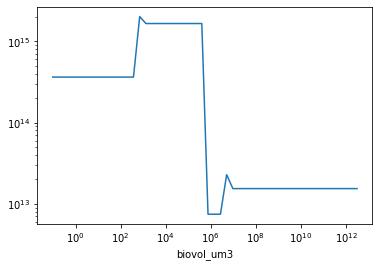

In [99]:
biovolume_all_ssp585.mean(dim=('lat', 'lon', 'time')).plot()
plt.xscale('log')
plt.yscale('log')

## Get the total biovolume for only the size range included in PSSdb UVP+Zooscan

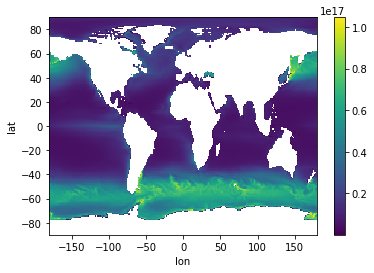

In [100]:
biovol_mask_ssp585 = ~np.isnan(biovolume_all_ssp585.mean(dim=('biovol_um3')))
biovolume_all_subset_ssp585= biovolume_all_ssp585.where((biovolume_all_ssp585['biovol_um3']>826400.0) & (biovolume_all_ssp585['biovol_um3']<49100000000000.0)).sum(dim=['biovol_um3'])
biovolume_all_ssp585= biovolume_all_ssp585.sum(dim=['biovol_um3'])
biovolume_all_ssp585 = biovolume_all_ssp585.where(biovol_mask_ssp585)
biovolume_all_subset_ssp585 = biovolume_all_subset_ssp585.where(biovol_mask_ssp585)
biovolume_all_ssp585.mean(dim=('time')).plot()

                               

In [101]:
biovolume_all_ssp585_NB = size_spectra(biovolume_all_ssp585_NB,ds_ssp585, NB=True)

phypico
8.47713480134061e+16
zmicro
152105185629.02902
phydiat
161658892388694.16
phymisc
78418626701.08408
zmeso
40986183.60762325


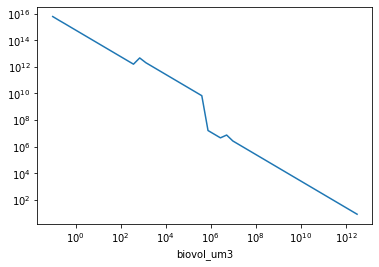

In [102]:
biovolume_all_ssp585_NB.mean(dim=('lat', 'lon', 'time')).plot()
plt.xscale('log')
plt.yscale('log')

In [103]:
# removing data from mediterranean and black sea
#biovolume_all_ssp585.loc[dict(lat=biovolume_all_ssp585.coords['lat'][(biovolume_all_ssp585.coords['lat'] >= 30.5) & (biovolume_all_ssp585.coords['lat'] <= 47.5)],
                                        #lon=biovolume_all_ssp585.coords['lon'][(biovolume_all_ssp585.coords['lon'] >= -5.5) & (biovolume_all_ssp585.coords['lon'] <= 55.5)])]=float('nan')#

In [104]:
betas_ssp5, intercept_ssp5, R2_ssp5, RMSE_ssp5 = calculate_size_spectra_slopes(biovolume_all_ssp585_NB)
betas_ssp5.shape

(360, 180, 360)

In [105]:
np.nanmean(betas_ssp5)

-1.1516379824660608

In [106]:
biovolume_all_ssp585_NB.values=10**(biovolume_all_ssp585_NB.values)

In [107]:
#phypico=g_carbon_to_biovol(((ds_ssp585.phypico_0_200.values)*carbon_molar_mass), 'phypico')
#phymisc=g_carbon_to_biovol(((ds_ssp585.phymisc_0_200.values)*carbon_molar_mass), 'phymisc')
#phydiat=g_carbon_to_biovol(((ds_ssp585.phydiat_0_200.values)*carbon_molar_mass), 'phydiat')
#zmicro=g_carbon_to_biovol(((ds_ssp585.zmicro_0_200.values)*carbon_molar_mass), 'zmicro')
#zmeso=g_carbon_to_biovol(((ds_ssp585.zmeso_0_200.values)*carbon_molar_mass), 'zmeso')



## Get the slopes for each biome

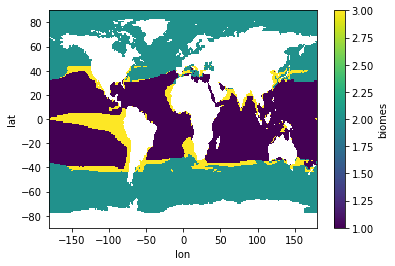

In [108]:
# load the biome mask
biome_mask = '/work/jyl/proj/CMIP6_models/ESM_Biomes/GFDL_ssp585_biomes_x1.nc'
biomes_ssp5 = xr.open_dataset(biome_mask)
biomes_mask = ~np.isnan(biomes_ssp5.biomes)
biomes_ssp5['biomes'] = biomes_ssp5['biomes'].where((biomes_ssp5['lat'] > -44.5) & (biomes_ssp5['lat'] < 44.5), 2)
biomes_ssp5 = biomes_ssp5.where(biomes_mask)
#biomes_ssp5 = biomes_ssp5.assign_coords(lat=(biomes_ssp5.lat * -1))
biomes_ssp5.biomes.plot()

In [109]:

# add slopes to the biomes dataset
biomes_ssp5['chl'] = (('time', 'lat', 'lon'), chl_ssp5.schl.values)
biomes_ssp5['chl'].attrs = {"units": 'kg m-3', 'Description': 'Surface Mass Concentration of Total Phytoplankton expressed as Chlorophyll in Sea Water'}

biomes_ssp5['NB'] = biovolume_all_ssp585_NB
biomes_ssp5['NB'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'normalized biovolume for each size class'}

#biomes_ssp5['total_biovolume_ssp5_full'] = biovolume_all
biomes_ssp5['total_biovolume_ssp5'] = biovolume_all_subset_ssp585#(('time', 'lat', 'lon'),biovolume_all.values)
biomes_ssp5['total_biovolume_ssp5'].attrs = {"units": 'um^3 ', 'Description': 'total biovolume from the size range of 116-2000 micrometers'}

biomes_ssp5['betas_ssp5'] = (('time', 'lat', 'lon'), betas_ssp5)
biomes_ssp5['betas_ssp5'].attrs = {"units": 'm^-2 m^-3', 'Description': 'Normalized biovolume size spectra slope'}

biomes_ssp5['intercept_ssp5'] = (('time', 'lat', 'lon'), intercept_ssp5)
biomes_ssp5['intercept_ssp5'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'Normalized biovolume size spectra intercept'}

biomes_ssp5['R2_ssp5'] = (('time', 'lat', 'lon'), R2_ssp5)
biomes_ssp5['R2_ssp5'].attrs = { 'Description': 'Normalized biovolume coefficient of determination'}

biomes_ssp5['RMSE_ssp5'] = (('time', 'lat', 'lon'), RMSE_ssp5)
biomes_ssp5['RMSE_ssp5'].attrs = {"units": 'um^3 m^-2 m^-3', 'Description': 'Normalized biovolume size spectra Root mean square error'}

#original_biomass_variables
biomes_ssp5['phypico'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_ssp585.phypico_0_200.values*carbon_molar_mass, 'phypico'))
biomes_ssp5['phypico'].attrs = {"units": 'um^3', 'Description': 'picophytoplankton biovolume'}

biomes_ssp5['phymisc'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_ssp585.phymisc_0_200.values*carbon_molar_mass, 'phymisc'))
biomes_ssp5['phymisc'].attrs = {"units": 'um^3', 'Description': 'miscellaneous phytoplankton biovolume'}

biomes_ssp5['phydiat'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_ssp585.phydiat_0_200.values*carbon_molar_mass, 'phydiat'))
biomes_ssp5['phydiat'].attrs = {"units": 'um^3', 'Description': 'diatom biovolume'}

biomes_ssp5['zmicro'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_ssp585.zmicro_0_200.values*carbon_molar_mass, 'zmicro'))
biomes_ssp5['zmicro'].attrs = {"units": 'um^3', 'Description': 'microzooplankton biovolume'}

biomes_ssp5['zmeso'] = (('time', 'lat', 'lon'),g_carbon_to_biovol(ds_ssp585.zmeso_0_200.values*carbon_molar_mass, 'zmeso'))
biomes_ssp5['zmeso'].attrs = {"units": 'um^3', 'Description': 'mesozooplankton biovolume'}

biomes_ssp5['total_biovolume_full']=(('time', 'lat', 'lon'), biomes_ssp5.phypico.values+biomes_ssp5.phymisc.values+biomes_ssp5.phydiat.values+biomes_ssp5.zmicro.values+biomes_ssp5.zmeso.values)
biomes_ssp5['total_biovolume_full'].attrs = {"units": 'um^3', 'Description': 'all plankton biovolume'}
                                          
#percentage total
biomes_ssp5['phypico_per'] = (('time', 'lat', 'lon'), (biomes_ssp5.phypico.values/biomes_ssp5.total_biovolume_full.values)*100)
biomes_ssp5['phypico_per'].attrs = {'Description': 'picophytoplankton percentage of total biovolume'}  

biomes_ssp5['phymisc_per'] = (('time', 'lat', 'lon'), (biomes_ssp5.phymisc.values/biomes_ssp5.total_biovolume_full.values)*100)
biomes_ssp5['phymisc_per'].attrs = {'Description': 'miscellaneous phytoplankton percentage of total biovolume'}                                        
                                          
biomes_ssp5['phydiat_per'] = (('time', 'lat', 'lon'),(biomes_ssp5.phydiat.values/biomes_ssp5.total_biovolume_full.values)*100)
biomes_ssp5['phydiat_per'].attrs = {'Description': 'diatom percentage of total biovolume'}                                           
                                          
biomes_ssp5['zmicro_per'] = (('time', 'lat', 'lon'),(biomes_ssp5.zmicro.values/biomes_ssp5.total_biovolume_full.values)*100)
biomes_ssp5['zmicro_per'].attrs = {'Description': 'microzooplankton percentage of total biovolume'} 

biomes_ssp5['zmeso_per'] = (('time', 'lat', 'lon'),(biomes_ssp5.zmeso.values/biomes_ssp5.total_biovolume_full.values)*100)
biomes_ssp5['zmeso_per'].attrs = {'Description': 'mesozooplankton percentage of total biovolume'} 

#total biovolume
biomes_ssp5['phyc'] = (('time', 'lat', 'lon'), biomes_ssp5.phypico.values+biomes_ssp5.phymisc.values+biomes_ssp5.phydiat.values)
biomes_ssp5['phyc'].attrs = {"units": 'um^3', 'Description': 'phytoplankton biovolume'}

biomes_ssp5['zooc'] = (('time', 'lat', 'lon'), biomes_ssp5.zmicro.values+biomes_ssp5.zmeso.values)
biomes_ssp5['zooc'].attrs = {"units": 'um^3', 'Description': 'zooplankton biovolume'}

#biomes_ssp5['total_biovolume_ssp5']= (('time', 'lat', 'lon'), phypico+phydiat+zooc)
biomes_ssp5

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 2071-01-16 12:00:00 ... 2100-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 nan nan nan nan ... 2.0 2.0 2.0 2.0
    chl                   (time, lat, lon) float64 nan nan ... 2.4e-08 2.4e-08
    NB                    (biovol_um3, time, lat, lon) float64 nan nan ... 4.083
    total_biovolume_ssp5  (time, lat, lon) float64 nan nan ... 1.732e+14
    betas_ssp5            (time, lat, lon) float64 nan nan ... -0.9788 -0.9788
    intercept_ssp5        (time, lat, lon) float64 nan nan ... 7.453e+12
    ...                    ...
    phymisc_per           (time, lat, lon) float32 nan nan ... 0.0586 0.05885
    phydiat_per           (time, lat, lon) float32 nan nan nan ... 34.36 34.39
    zmicro_per            (time, lat, lon) float32 nan nan nan ... 2.546 2.557
    zmeso_per             (time, lat, lon) float32 nan nan nan ... 47.28 47.25
    phyc                  (time, lat, lon) float32 nan nan ... 1.82e+14
    zooc                  (time, lat, lon) float32 nan nan ... 1.806e+14

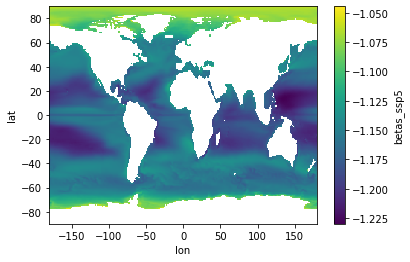

In [110]:
biomes_ssp5.mean(dim=('time')).betas_ssp5.plot()

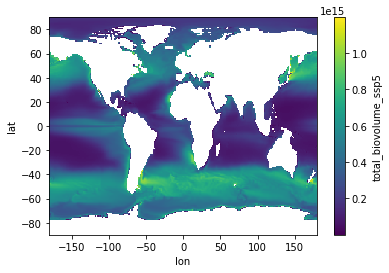

In [111]:
biomes_ssp5.mean(dim=('time')).total_biovolume_ssp5.plot()

In [112]:
biomes_ssp5.to_netcdf('/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc')

In [113]:
biomes_ssp5.lat

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## include code to assess the size spectra

In [114]:
from wcmatch.pathlib import Path # Handling of path object

In [115]:
test_df = biomes_hist.mean(dim=['time']).to_dataframe()
test_df=test_df.dropna().reset_index()
test_df=test_df.drop_duplicates().reset_index(drop=True)
test_df['biomes'] = test_df['biomes'].astype(str)
test_df = test_df.replace({'biomes':{'1.0':'LC','2.0':'HCSS','3.0':'HCPS'}})

In [116]:
import math as m
test_df['source']='GFDL'
test_df['ECD'] = ((test_df['biovol_um3']*6)/m.pi)**(1./3.)
test_df=test_df.astype(dict(zip(['biovol_um3', 'ECD'],[str]*2))).groupby(['source', 'biovol_um3', 'ECD']).apply(lambda x: pd.Series({'NB':np.nanmean(x.NB)})).reset_index()
test_df['biovol_um3']=test_df['biovol_um3'].astype(float)
test_df['ECD']=test_df['ECD'].astype(float)
test_df

,source,biovol_um3,ECD,NB
0,GFDL,9.575000e-02,0.567606,6.539099e+15
1,GFDL,1.810000e-01,0.701821,3.415512e+15
2,GFDL,3.415000e-01,0.867223,1.830322e+15
3,GFDL,6.440000e-01,1.071427,9.660033e+14
4,GFDL,1.215500e+00,1.324094,5.120981e+14
5,GFDL,1.024549e+10,2694.706026,2.747646e+03
6,GFDL,1.034815e+02,5.824894,6.017102e+12
7,GFDL,1.116099e+05,59.735806,2.717501e+10
8,GFDL,1.203770e+08,612.606471,2.338570e+05
9,GFDL,1.298326e+11,6282.441160,2.168252e+02


In [117]:
bins_df = pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/ecopart_size_bins.csv', sep = ',')
test_df.loc[:, 'sizeClasses']= pd.cut(x=test_df['ECD'], bins=bins_df['ESD_um'], include_lowest=True)# size classes defined by biovolume
test_df['ECD'] = test_df.sizeClasses.apply(lambda x: x.mid)
test_df=test_df.drop(columns=['sizeClasses']).reset_index()
test_df['NB']=(test_df['NB']/200)*0.001# conversion to liters

In [118]:
from plotnine import *
colors = dict(CESM= 'red',CMCC= 'cyan', CNRM= 'gray',GFDL= 'lawngreen',IPSL= 'gold',UKESM= 'purple', PSSdb = 'blue')
breaks = [20, 200, 2000, 20000]#breaks = [1, 2, 20, 200]#
labels = [20, 200, 2000, 20000]#labels = [1, 2, 20, 200]#
theme_paper=theme(axis_ticks_direction="inout",
              panel_grid=element_blank(),
              axis_line = element_line(colour = "black"),
              panel_background=element_rect(fill='white'),
              panel_border=element_blank(),
              legend_title=element_text(family="serif", size=15),
              legend_position='none',#legend_position='top',
              legend_text=element_text(family="serif", size=15),
              axis_title=element_text(family="serif", size=15),
              axis_text_x=element_text(family="serif", size=15),
              axis_text_y=element_text(family="serif", size=15, rotation=90),
              plot_background=element_rect(fill='white'), strip_background=element_rect(fill='white'))

In [119]:
test_df['ECD']=test_df['ECD'].astype(float)

In [120]:
plot = (ggplot(data=test_df)+
        geom_line(test_df,aes(x='ECD', y='NB', color='source', group='source'),  size = 1) +
        geom_point(aes(x='ECD', y='NB',color='source', group='source'),size = 3,  shape = 'o')+
        #stat_summary(data=df_NB[df_NB.ECD.transform(lambda x: x.astype(str).isin(pd.Series(x.value_counts(normalize=True)[x.value_counts(normalize=True)>=np.quantile(x.value_counts(normalize=True),0.5)].index).astype(str)))],mapping=aes(x='ECD', y='NB'),geom='line', fun_y=np.nanmedian, size = 0.5, alpha=0.5)+
        #stat_summary(mapping=aes(x='ECD', y='NB'),geom='line', fun_y=np.nanmedian, size = 0.8)+
        labs(y=r'Normalized Biovolume ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', x=r'Equivalent circular diameter ($\mu$m)')+
        scale_color_manual(values = colors)+
        scale_y_log10(breaks=[10**np.arange(-5,10,step=2, dtype=np.float)][0],labels=['10$^{%s}$'% int(n) for n in np.arange(-5,10,step=2)] , limits=(1e-5, 1e11))+
        #scale_y_log10(breaks=[10**np.arange(-5,-3,step=0.5, dtype=np.float)][0],labels=['10$^{%s}$'% int(n) for n in np.arange(-5,-3,step=0.5)] , limits=(1e-5, 1e-3))+
        scale_x_log10(breaks=breaks, labels=labels,limits=(0.5, 35000))+
        #scale_x_log10(breaks=[size  for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))],labels= [size if (size / np.power(10, np.ceil(np.log10(size)))) == 1 else '' for size in np.sort( np.concatenate(np.arange(1, 10).reshape((9, 1)) * np.power(10, np.arange(1, 5, 1))))], limits=(1, 15000))+
        theme_paper).draw(show=False)
plot.set_size_inches(6,6)
plot.savefig(fname='{}/work/CMIP6_size_spectra_scripts/plots/NBSS_GFDL_mean.pdf'.format(str(Path.home())), dpi=300)